In [40]:
import pandas as pd
data1 = pd.read_csv('datasets/abalone.csv')
data1
# now in abalone dataset, we'll try to predict the age of abalone based on other features
# I meaning in sex column is infant
# we'll convert this column to one hot encoding
# the age of abalone is the number of rings + 1.5

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
#split dataset in features and target variable

# Features
# since sex column is categorical. we should encode this column via one-hot encoding
# get_dummies used to convert categorical variables into numerical variables by creating dummy/indicator variables
X = pd.get_dummies(data1[['Sex', 'Length', 'Diameter', 'Height',
                          'Whole weight', 'Shucked weight',
                          'Viscera weight', 'Shell weight']],
                   columns=['Sex'], drop_first=True) # drop_first used to prevent redundancy of number of columns. only f, m instead of i, f, m
X = X.astype(float) # did this for new sex columns. to convert them to int

# Target variable
def classify_age(rings):
    if rings <= 8:
        return 'Young'
    elif rings <= 16:
        return 'Middle-aged'
    else:
        return 'Old'

data1['AgeGroup'] = data1['Rings'].apply(classify_age)

y = data1['AgeGroup']

In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [45]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# training the model on the given dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
# uses the trained decision tree (clf) to make predictions on new data (X_test)
y_pred = clf.predict(X_test)

In [46]:
# displays the accuracy of the trained decision tree model on the test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7990430622009569


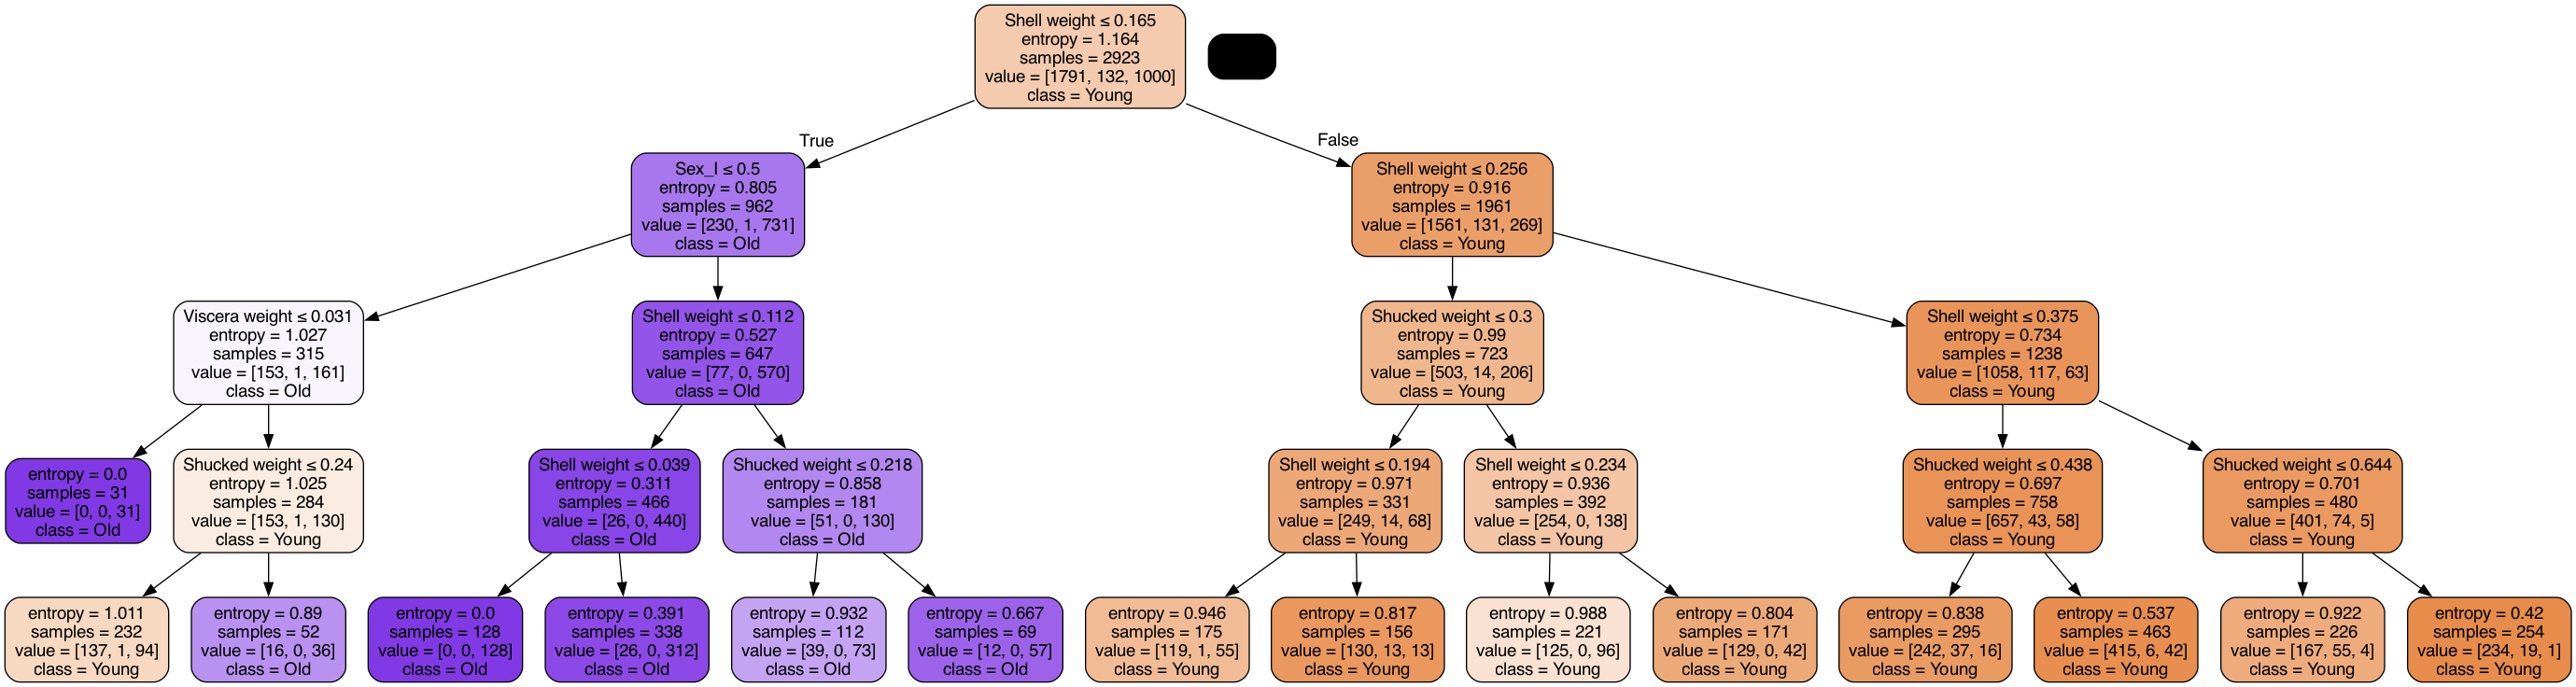

In [47]:
#!pip install graphviz
import sklearn
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

feature_names = ['Length', 'Diameter', 'Height', 'Whole weight',
                 'Shucked weight', 'Viscera weight', 'Shell weight',
                 'Sex_I', 'Sex_M']  # adjusted for get_dummies with drop_first=True

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_names, class_names=['Young', 'Middle-aged', 'Old'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('abalone.png')
Image(graph.create_png())

In [48]:
X = pd.get_dummies(data1[['Sex', 'Length', 'Diameter', 'Height',
                          'Whole weight', 'Shucked weight',
                          'Viscera weight', 'Shell weight']],
                   columns=['Sex'], drop_first=True) # drop_first used to prevent redundancy of number of columns. only f, m instead of i, f, m

# Target variable
def classify_age(rings):
    if rings <= 8:
        return 'Young'
    elif rings <= 16:
        return 'Middle-aged'
    else:
        return 'Old'

data1['AgeGroup'] = data1['Rings'].apply(classify_age)

y = data1['AgeGroup']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [51]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#confusion matrix
#               Predicted Positive    Predicted Negative
#Actual Positive        TP                    FN
#Actual Negative        FP                    TN

array([[585,   1,  62],
       [ 38,   1,   0],
       [112,   0, 246]])

Text(0.5, 427.9555555555555, 'Predicted label')

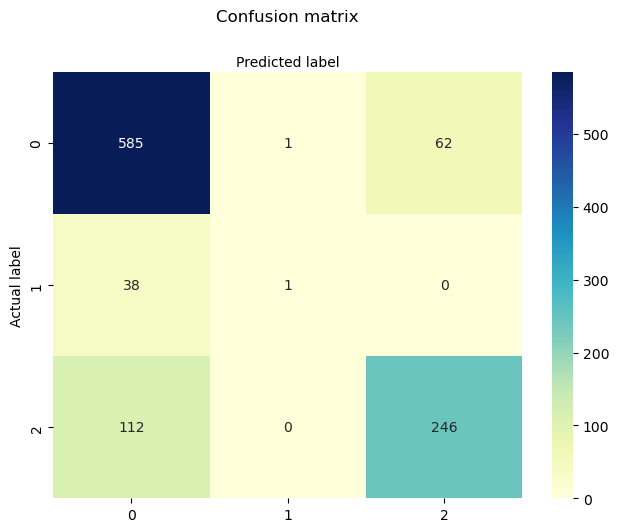

In [32]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1, 2, 3, 4, 5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
from sklearn.metrics import classification_report
target_names = ['Young', 'Middle-aged', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Young       0.80      0.90      0.85       648
 Middle-aged       0.50      0.03      0.05        39
         Old       0.80      0.69      0.74       358

    accuracy                           0.80      1045
   macro avg       0.70      0.54      0.54      1045
weighted avg       0.79      0.80      0.78      1045



In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#Accuracy = TP+TN/TP+FP+FN+TN

0.7961722488038278

In [54]:
#Recall = TP/TP+FN
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.5385232138025434

In [55]:
#Precision = TP/TP+FP
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.6982065553494126